In [45]:
#Sashank Singh

In [46]:
# Research on Market anonamlities 

In [47]:
# Install all dependencies
!pip install pandas numpy openpyxl scikit-learn matplotlib tensorflow keras

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [49]:
df = pd.read_excel("Financial-Market-Data.xlsx", header = 5)
df = pd.DataFrame(df)

In [50]:
df.head()

,Unnamed: 0,Unnamed: 1,Ticker,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,JPY Curncy,GBP Curncy,...,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Index,VG1 Index,NQ1 Index,LLL1 Index,TP1 Index,DU1 Comdty,TU2 Comdty
0,NaN,NaN,NaT,284.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1999-04-27,282.25,NaN,995.0,134.65,100.63,120.44,1.6174,...,115.56250,282.3,15.80,1376.50,3726.0,NaN,NaN,1347.5,105.69,104.898438
2,Depth,ED-22AY,1999-05-04,285.55,NaN,1095.0,139.04,100.68,120.77,1.6264,...,114.31250,286.9,16.93,1343.00,3740.0,NaN,NaN,1328.5,105.58,104.664062
3,Date,PX_Last,1999-05-11,278.25,NaN,1121.0,136.78,100.24,121.07,1.6210,...,113.34375,278.8,15.96,1358.25,3690.0,NaN,NaN,1343.5,105.67,104.406250
4,Days (T/W/A),W,1999-05-18,273.95,NaN,1061.0,133.90,100.72,123.21,1.6213,...,112.34375,274.2,15.14,1341.25,3595.0,NaN,NaN,1323.5,105.60,104.140625


In [51]:
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Ticker', 'XAU BGNL Curncy',
       'ECSURPUS Index', 'BDIY Index', 'CRY Index', 'DXY Curncy', 'JPY Curncy',
       'GBP Curncy', 'Cl1 Comdty', 'VIX Index', 'USGG30YR Index', 'GT10 Govt',
       'USGG2YR Index', 'USGG3M Index', 'US0001M Index', 'GTDEM30Y Govt',
       'GTDEM10Y Govt', 'GTDEM2Y Govt', 'EONIA Index', 'GTITL30YR Corp',
       'GTITL10YR Corp', 'GTITL2YR Corp', 'GTJPY30YR Corp', 'GTJPY10YR Corp',
       'GTJPY2YR Corp', 'GTGBP30Y Govt', 'GTGBP20Y Govt', 'GTGBP2Y Govt',
       'LUMSTRUU Index', 'LMBITR Index', 'LUACTRUU Index', 'LF98TRUU Index',
       'LG30TRUU Index', 'LP01TREU Index', 'EMUSTRUU Index', 'LF94TRUU Index',
       'MXUS Index', 'MXEU Index', 'MXJP Index', 'MXBR Index', 'MXRU Index',
       'MXIN Index', 'MXCN Index', 'MXWO Index', 'MXWD Index',
       'LEGATRUU Index', 'HFRXGL Index', 'RX1 Comdty', 'TY1 Comdty',
       'GC1 Comdty', 'CO1 Comdty', 'ES1 Index', 'VG1 Index', 'NQ1 Index',
       'LLL1 Index', 'TP1 Index', 'DU1 

In [52]:
new_df = df[["Ticker","VIX Index","NQ1 Index", "USGG30YR Index","GC1 Comdty"]]

In [53]:
new_df = new_df.rename(columns={
    'Ticker':'Date',
    'NQ1 Index': 'Nasdaq Futures',
    'USGG30YR Index': '30-Year Treasury Yield',
    'GC1 Comdty': 'Gold Futures'
})
new_df = new_df.dropna()## drop Nans
new_df = new_df.reset_index(drop = True)
new_df

,Date,VIX Index,Nasdaq Futures,30-Year Treasury Yield,Gold Futures
0,1999-06-22,21.70,2242.50,6.0570,259.4
1,1999-06-29,22.51,2294.00,6.0680,262.0
2,1999-07-06,20.73,2365.00,6.0370,257.8
3,1999-07-13,19.95,2395.00,5.9100,256.7
4,1999-07-20,21.79,2353.00,5.8860,254.1
...,...,...,...,...,...
1135,2021-03-23,20.30,13006.25,2.3264,1725.1
1136,2021-03-30,19.61,12878.25,2.3687,1683.9
1137,2021-04-06,18.12,13570.00,2.3230,1741.5
1138,2021-04-13,16.65,13975.75,2.2939,1746.2


In [54]:
correlation_matrix = new_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            Date  VIX Index  Nasdaq Futures  \
Date                    1.000000  -0.193059        0.771032   
VIX Index              -0.193059   1.000000       -0.116869   
Nasdaq Futures          0.771032  -0.116869        1.000000   
30-Year Treasury Yield -0.937683   0.065792       -0.712164   
Gold Futures            0.889613  -0.087648        0.617155   

                        30-Year Treasury Yield  Gold Futures  
Date                                 -0.937683      0.889613  
VIX Index                             0.065792     -0.087648  
Nasdaq Futures                       -0.712164      0.617155  
30-Year Treasury Yield                1.000000     -0.874889  
Gold Futures                         -0.874889      1.000000  


In [55]:
print(new_df.isnull().sum())

Date                      0
VIX Index                 0
Nasdaq Futures            0
30-Year Treasury Yield    0
Gold Futures              0
dtype: int64


In [56]:
new_df.describe()

,Date,VIX Index,Nasdaq Futures,30-Year Treasury Yield,Gold Futures
count,1140,1140.000000,1140.000000,1140.000000,1140.000000
mean,2010-05-21 12:00:00,20.079228,3504.439693,3.965581,969.295000
min,1999-06-22 00:00:00,9.430000,814.500000,1.162600,253.500000
25%,2004-12-05 06:00:00,13.705000,1633.437500,2.976975,422.325000
50%,2010-05-21 12:00:00,18.145000,2364.375000,4.192000,1119.000000
75%,2015-11-04 18:00:00,23.722500,4437.187500,4.899375,1319.900000
max,2021-04-20 00:00:00,75.910000,13975.750000,6.747000,2001.200000
std,NaN,8.554743,2670.929548,1.216598,500.831298


In [57]:
# # Statistical Anomaly Detection

z_scores = np.abs((new_df['Nasdaq Futures'] - new_df['Nasdaq Futures'].mean()) / new_df['Nasdaq Futures'].std())
threshold = 3  # Common threshold for anomalies
anomalies = new_df[z_scores > threshold]
print(anomalies)

           Date  VIX Index  Nasdaq Futures  30-Year Treasury Yield  \
1105 2020-08-25      22.03        11726.25                  1.3935   
1106 2020-09-01      26.12        12312.50                  1.4200   
1112 2020-10-13      26.07        12094.00                  1.5107   
1113 2020-10-20      29.35        11660.75                  1.5915   
1114 2020-10-27      33.35        11588.00                  1.5530   
1116 2020-11-10      24.80        11618.25                  1.7415   
1117 2020-11-17      22.71        11975.00                  1.6059   
1118 2020-11-24      21.64        12076.00                  1.6052   
1119 2020-12-01      20.77        12452.25                  1.6682   
1120 2020-12-08      20.68        12637.50                  1.6622   
1121 2020-12-15      22.89        12591.75                  1.6502   
1122 2020-12-22      24.23        12710.00                  1.6482   
1123 2020-12-29      23.08        12841.00                  1.6750   
1124 2021-01-05     

<Axes: xlabel='VIX Index'>

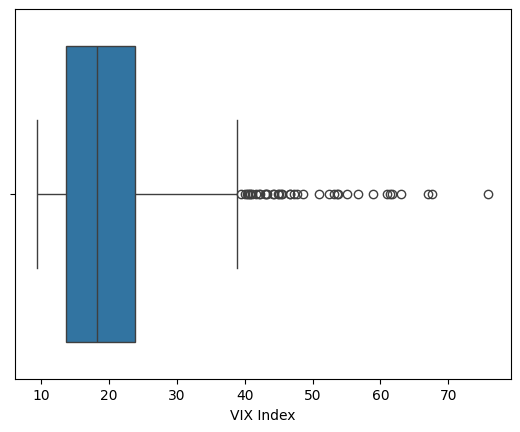

In [58]:
sns.boxplot(x=df['VIX Index'])

In [59]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Prepare data for LSTM
sequence_length = 10
features = ['VIX Index', 'Nasdaq Futures', '30-Year Treasury Yield', 'Gold Futures']

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_df[features])

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [62]:
# Cell 7
# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, len(features)), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(len(features))
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

/Users/2825996/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1105 - val_loss: 0.0390
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0318 - val_loss: 0.0225
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0175 - val_loss: 0.0132
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129 - val_loss: 0.0115
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 - val_loss: 0.0088
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0081
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - val_loss: 0.0081
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0075
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0067
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0057
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - val_loss: 0.0058
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - val_lo

In [63]:
# Cell 8
# Make predictions and calculate errors
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Calculate prediction errors
train_mae = np.mean(np.abs(train_predict - y_train), axis=1)
test_mae = np.mean(np.abs(test_predict - y_test), axis=1)

# Define threshold for anomalies
threshold = np.percentile(train_mae, 95)

# Detect anomalies
train_anomalies = train_mae > threshold
test_anomalies = test_mae > threshold

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


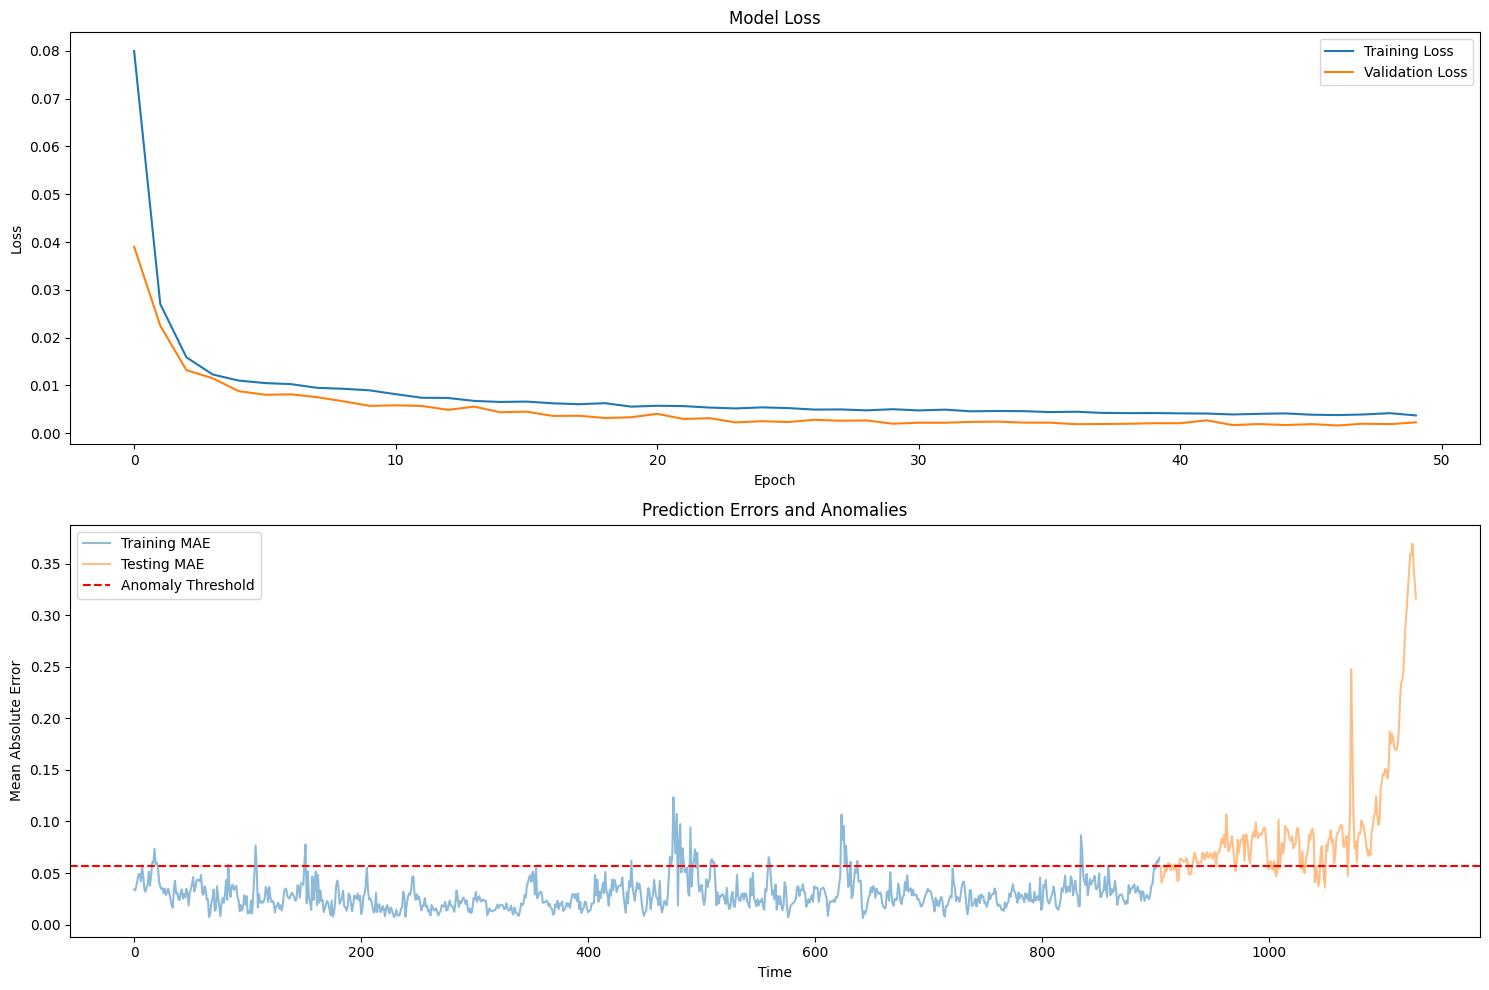

In [64]:
# Cell 9
# Visualize results
plt.figure(figsize=(15, 10))

# Plot training loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot prediction errors and anomalies
plt.subplot(2, 1, 2)
plt.plot(train_mae, label='Training MAE', alpha=0.5)
plt.plot(range(len(train_mae), len(train_mae) + len(test_mae)),
         test_mae, label='Testing MAE', alpha=0.5)
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Prediction Errors and Anomalies')
plt.xlabel('Time')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
# Cell 10
# Print summary of anomalies
print("\nAnomaly Detection Summary:")
print(f"Training set anomalies: {np.sum(train_anomalies)} ({np.mean(train_anomalies)*100:.2f}%)")
print(f"Testing set anomalies: {np.sum(test_anomalies)} ({np.mean(test_anomalies)*100:.2f}%)")

# Create DataFrame with anomaly dates
anomaly_dates = pd.DataFrame({
    'Date': new_df['Date'][sequence_length:],
    'Error': np.concatenate([train_mae, test_mae]),
    'Is_Anomaly': np.concatenate([train_anomalies, test_anomalies])
})

# Display the most recent anomalies
print("\nMost Recent Anomalies:")
recent_anomalies = anomaly_dates[anomaly_dates['Is_Anomaly']].tail(10)
print(recent_anomalies)


Anomaly Detection Summary:
Training set anomalies: 46 (5.09%)
Testing set anomalies: 188 (83.19%)

Most Recent Anomalies:
           Date     Error  Is_Anomaly
1130 2021-02-16  0.293300        True
1131 2021-02-23  0.307846        True
1132 2021-03-02  0.326199        True
1133 2021-03-09  0.342587        True
1134 2021-03-16  0.359502        True
1135 2021-03-23  0.358995        True
1136 2021-03-30  0.369713        True
1137 2021-04-06  0.346515        True
1138 2021-04-13  0.331446        True
1139 2021-04-20  0.316402        True


In [66]:
# Cell 11
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': features,
    'Mean_Error': np.mean(np.abs(test_predict - y_test), axis=0)
})
feature_importance = feature_importance.sort_values('Mean_Error', ascending=False)

print("\nFeature Importance (based on prediction errors):")
print(feature_importance)


Feature Importance (based on prediction errors):
                  Feature  Mean_Error
2  30-Year Treasury Yield    0.153210
0               VIX Index    0.107722
1          Nasdaq Futures    0.088393
3            Gold Futures    0.034924


In [67]:
# Cell 12
# Function to predict future values
def predict_future(model, last_sequence, n_steps):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_steps):
        next_pred = model.predict(current_sequence.reshape(1, sequence_length, len(features)))
        future_predictions.append(next_pred[0])

        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = next_pred[0]

    return np.array(future_predictions)

# Predict next 5 steps
last_sequence = X_test[-1]
future_steps = 5
future_predictions = predict_future(model, last_sequence, future_steps)

# Inverse transform predictions
future_predictions_original = scaler.inverse_transform(future_predictions)

print("\nFuture Predictions (next 5 steps):")
future_dates = pd.date_range(start=new_df['Date'].iloc[-1], periods=future_steps+1, freq='W')[1:]
future_df = pd.DataFrame(future_predictions_original, columns=features, index=future_dates)
print(future_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Future Predictions (next 5 steps):
            VIX Index  Nasdaq Futures  30-Year Treasury Yield  Gold Futures
2021-05-02  43.668198    18411.816406               -0.458877   1860.563477
2021-05-09  47.634602    19222.089844               -0.663094   1853.621338
2021-05-16  53.469826    20671.548828               -1.045092   1865.447021
2021-05-23  61.416409    23115.621094               -1.659619   1892.703003
2021-05-30  72.066216    26678.878906               -2.549263   1933.245850


/Users/2825996/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0291 - val_loss: 0.0047
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 - val_loss: 0.0047
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 - val_loss: 0.0049
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 - val_lo

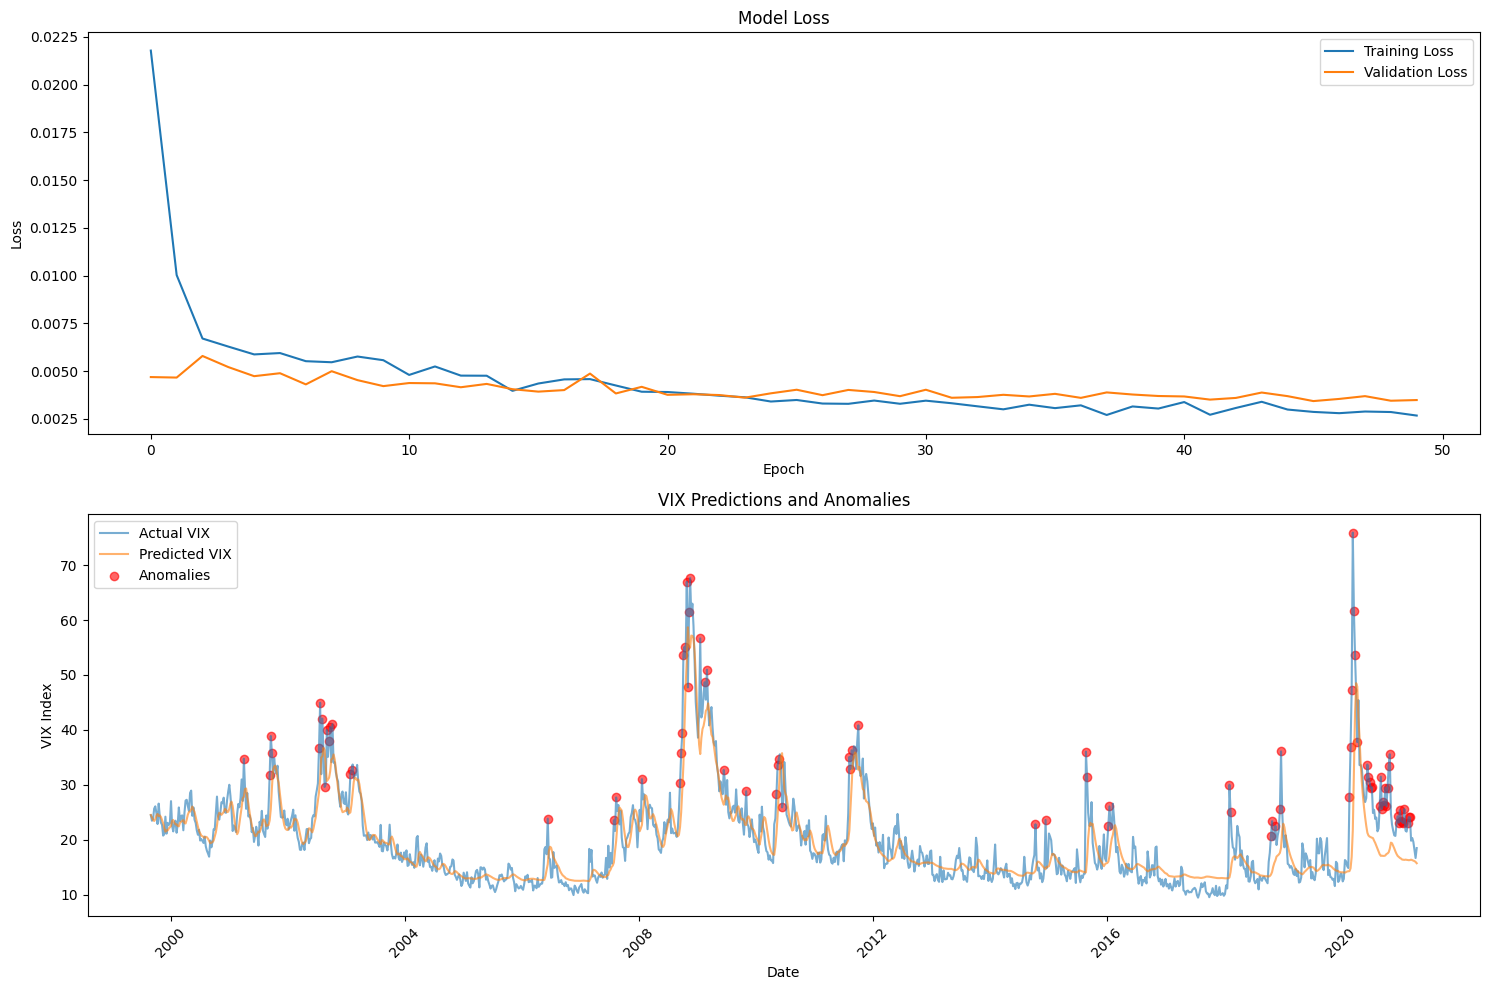


Mean Absolute Error during anomalies: 10.90

Average Feature Values During Anomalies:
                                Date  VIX Index  Nasdaq Futures  \
count                             85  85.000000       85.000000   
mean   2013-09-08 16:22:35.294117632  34.559765     5667.435294   
min              2001-04-03 00:00:00  20.710000      814.500000   
25%              2008-10-07 00:00:00  25.870000     1380.500000   
50%              2015-08-25 00:00:00  31.460000     4086.500000   
75%              2020-07-07 00:00:00  38.010000    10532.250000   
max              2021-03-09 00:00:00  75.910000    13485.500000   
std                              NaN  11.693632     4612.386305   

       30-Year Treasury Yield  Gold Futures  
count               85.000000     85.000000  
mean                 3.160793   1230.920000  
min                  1.279900    256.800000  
25%                  1.680000    777.100000  
50%                  3.067700   1233.200000  
75%                  4.311000   1

In [68]:
# Cell 13
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Prepare data for VIX prediction
def prepare_vix_data(df, sequence_length=10):
    # Create sequences using all features to predict VIX
    features = ['VIX Index', 'Nasdaq Futures', '30-Year Treasury Yield', 'Gold Futures']
    data = df[features].values
    
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    X = []
    y = []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:(i + sequence_length)])
        y.append(scaled_data[i + sequence_length, 0])  # VIX Index is the first column
    
    return np.array(X), np.array(y), scaler

# Parameters
sequence_length = 10
train_size = int(len(new_df) * 0.8)

# Prepare sequences
X, y, scaler = prepare_vix_data(new_df, sequence_length)

# Split into train and test sets
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Build LSTM model for VIX prediction
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 4), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Calculate prediction errors
train_mae = np.abs(train_predict.flatten() - y_train)
test_mae = np.abs(test_predict.flatten() - y_test)

# Define threshold for anomalies (95th percentile of training errors)
threshold = np.percentile(train_mae, 95)

# Detect anomalies
train_anomalies = train_mae > threshold
test_anomalies = test_mae > threshold

# Inverse transform predictions for VIX
def inverse_transform_vix(scaled_value):
    temp = np.zeros((len(scaled_value), 4))
    temp[:, 0] = scaled_value.flatten()
    return scaler.inverse_transform(temp)[:, 0]

train_predict_original = inverse_transform_vix(train_predict)
test_predict_original = inverse_transform_vix(test_predict)

# Get actual VIX values
vix_train = new_df['VIX Index'].values[sequence_length:train_size]
vix_test = new_df['VIX Index'].values[train_size:]

# Create DataFrame with predictions and anomalies
results_df = pd.DataFrame({
    'Date': new_df['Date'].values[sequence_length:],
    'Actual_VIX': np.concatenate([vix_train, vix_test]),
    'Predicted_VIX': np.concatenate([train_predict_original, test_predict_original]),
    'Is_Anomaly': np.concatenate([train_anomalies, test_anomalies])
})

# Print summary of anomalies
print("\nVIX Prediction during Anomalies:")
anomaly_periods = results_df[results_df['Is_Anomaly']]
print(f"\nNumber of detected anomalies: {len(anomaly_periods)}")
print("\nMost Recent Anomalies:")
print(anomaly_periods.tail())

# Visualize results
plt.figure(figsize=(15, 10))

# Plot 1: Training Loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot 2: VIX Predictions and Anomalies
plt.subplot(2, 1, 2)
plt.plot(results_df['Date'], results_df['Actual_VIX'], label='Actual VIX', alpha=0.6)
plt.plot(results_df['Date'], results_df['Predicted_VIX'], label='Predicted VIX', alpha=0.6)
plt.scatter(anomaly_periods['Date'], 
           anomaly_periods['Actual_VIX'],
           color='red', 
           label='Anomalies', 
           alpha=0.6)
plt.title('VIX Predictions and Anomalies')
plt.xlabel('Date')
plt.ylabel('VIX Index')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate prediction accuracy metrics for anomalies
anomaly_mae = np.mean(np.abs(anomaly_periods['Actual_VIX'] - anomaly_periods['Predicted_VIX']))
print(f"\nMean Absolute Error during anomalies: {anomaly_mae:.2f}")

# Analyze features during anomalies
print("\nAverage Feature Values During Anomalies:")
anomaly_dates = results_df[results_df['Is_Anomaly']]['Date']
feature_stats = new_df[new_df['Date'].isin(anomaly_dates)].describe()
print(feature_stats)

# Save anomaly predictions to CSV
results_df.to_csv('vix_anomaly_predictions.csv', index=False)
print("\nResults saved to 'vix_anomaly_predictions.csv'")

Number of anomalies detected: 85

Anomalies Details:
            Date  Actual_VIX  Predicted_VIX
83    2001-04-03       34.72      27.806467
106   2001-09-11       31.84      23.499823
107   2001-09-18       38.87      25.633474
108   2001-09-25       35.81      29.422242
150   2002-07-16       36.65      28.614521
...          ...         ...            ...
1117  2021-01-26       23.02      16.334570
1118  2021-02-02       25.56      16.312006
1121  2021-02-23       23.11      16.266940
1122  2021-03-02       24.10      16.252650
1123  2021-03-09       24.03      16.276399

[85 rows x 3 columns]

Average VIX during anomalies: 34.56


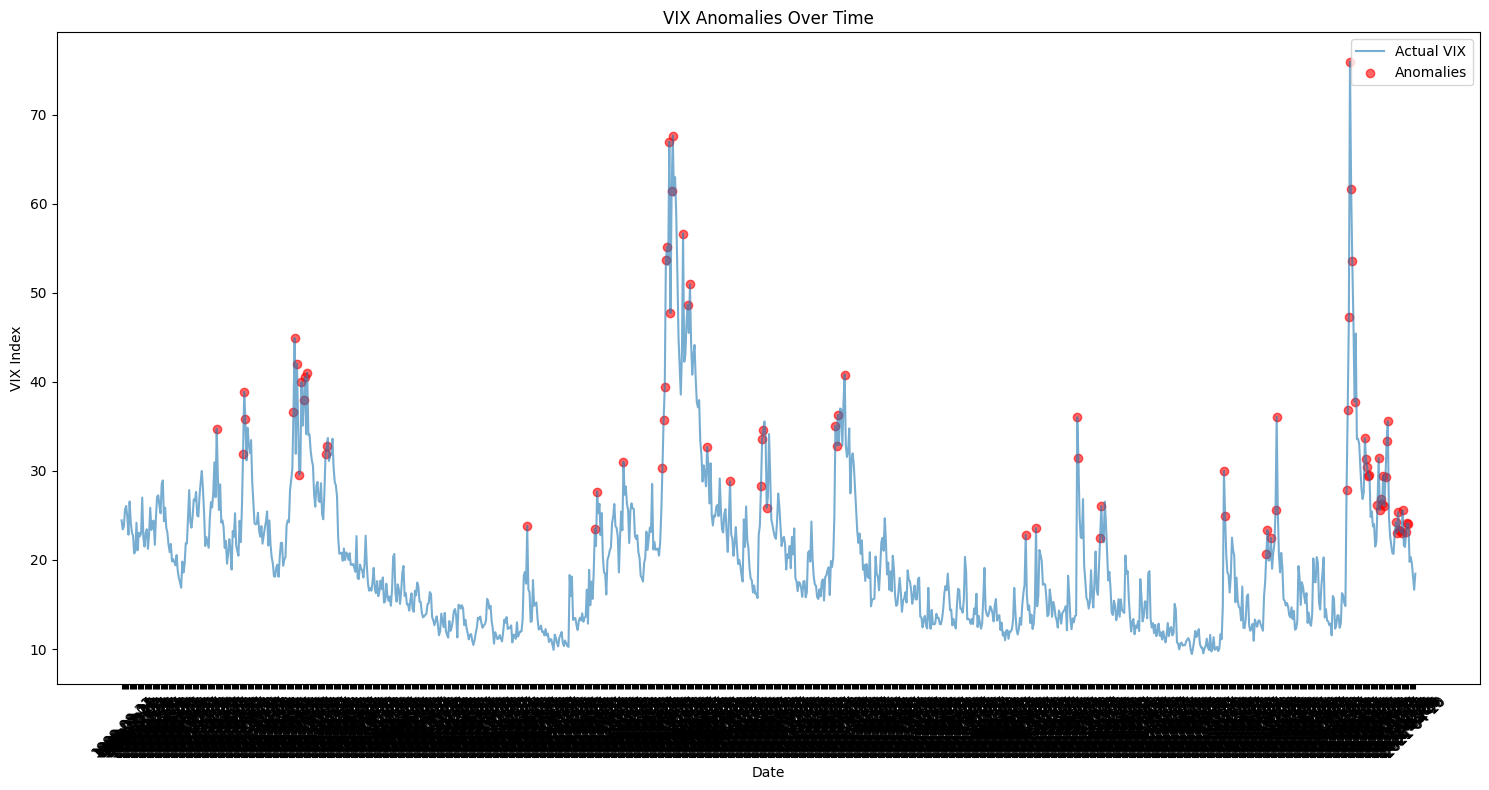


Yearly Distribution of Anomalies:
Year
2001     4
2002     8
2003     2
2006     1
2007     2
2008    10
2009     5
2010     4
2011     4
2014     2
2015     2
2016     2
2018     7
2020    24
2021     8
dtype: int64


/var/folders/84/ql248dn96vd7bq63ggbb33400000gp/T/ipykernel_72774/606758256.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['Year'] = pd.to_datetime(anomalies['Date']).dt.year


In [69]:
# Cell 14
# Read the saved predictions file
anomaly_predictions = pd.read_csv('vix_anomaly_predictions.csv')

# Filter for anomalies (Is_Anomaly == True)
anomalies = anomaly_predictions[anomaly_predictions['Is_Anomaly'] == True]

# Display the anomalies with key information
print(f"Number of anomalies detected: {len(anomalies)}")
print("\nAnomalies Details:")
anomaly_summary = anomalies[['Date', 'Actual_VIX', 'Predicted_VIX']].sort_values('Date')
print(anomaly_summary)

# Calculate average VIX during anomalies
avg_vix_during_anomalies = anomalies['Actual_VIX'].mean()
print(f"\nAverage VIX during anomalies: {avg_vix_during_anomalies:.2f}")

# Visualize anomalies
plt.figure(figsize=(15, 8))
plt.plot(anomaly_predictions['Date'], anomaly_predictions['Actual_VIX'],
         label='Actual VIX', alpha=0.6)
plt.scatter(anomalies['Date'], anomalies['Actual_VIX'],
           color='red', label='Anomalies', alpha=0.6)
plt.title('VIX Anomalies Over Time')
plt.xlabel('Date')
plt.ylabel('VIX Index')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Group anomalies by year to see distribution
anomalies['Year'] = pd.to_datetime(anomalies['Date']).dt.year
yearly_anomalies = anomalies.groupby('Year').size()
print("\nYearly Distribution of Anomalies:")
print(yearly_anomalies)